In [1]:
from xml.dom import minidom
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import friedmanchisquare, wilcoxon, mannwhitneyu, ranksums
import itertools
import glob, os
import numpy as np
import statistics as s
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scikit_posthocs as sp
import scipy as scipy

In [2]:
dat = pd.read_csv("Collaborative.csv")
print(dat['SUS'])

0     90.0
1     70.0
2     90.0
3     67.5
4     90.0
5     70.0
6     82.5
7     95.0
8     87.5
9     82.5
10    92.5
11    92.5
12    85.0
13    80.0
14    87.5
15    87.5
16    80.0
17    97.5
18    97.5
19    92.5
20    67.5
21    87.5
22    65.0
23    87.5
24    80.0
25    82.5
26    80.0
27    77.5
28    77.5
29    62.5
30    80.0
31    67.5
32    60.0
33    75.0
34    72.5
35    80.0
36    75.0
37    70.0
38    82.5
39    87.5
Name: SUS, dtype: float64


In [3]:
fc=dat[dat.Method == "Forced commit"]
vc=dat[dat.Method == "Voting commit"]
print(fc['SUS'])

0     90.0
1     70.0
6     82.5
7     95.0
8     87.5
9     82.5
14    87.5
15    87.5
16    80.0
17    97.5
22    65.0
23    87.5
24    80.0
25    82.5
30    80.0
31    67.5
32    60.0
33    75.0
38    82.5
39    87.5
Name: SUS, dtype: float64


# confronti tra metodi con statistica

In [5]:
scipy.stats.mannwhitneyu(fc['I worked closely together with my partner'],vc['I worked closely together with my partner'])

MannwhitneyuResult(statistic=208.5, pvalue=0.7939393966559718)

/home/andrea/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


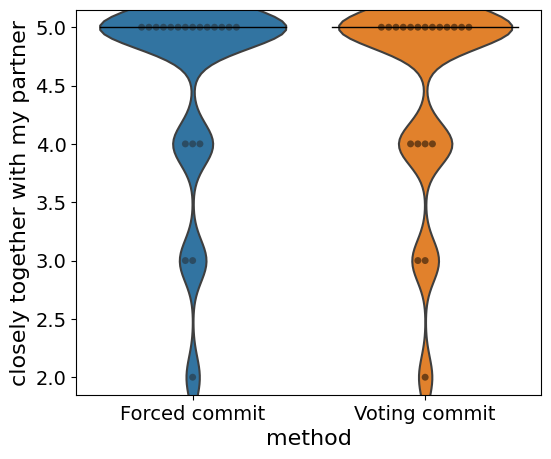

In [6]:
da=[fc['I worked closely together with my partner'],vc['I worked closely together with my partner']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=16)
plt.ylabel('closely together with my partner', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("together.svg")


/home/andrea/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


(array([ 55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 55.0, '55'),
  Text(0, 60.0, '60'),
  Text(0, 65.0, '65'),
  Text(0, 70.0, '70'),
  Text(0, 75.0, '75'),
  Text(0, 80.0, '80'),
  Text(0, 85.0, '85'),
  Text(0, 90.0, '90'),
  Text(0, 95.0, '95'),
  Text(0, 100.0, '100')])

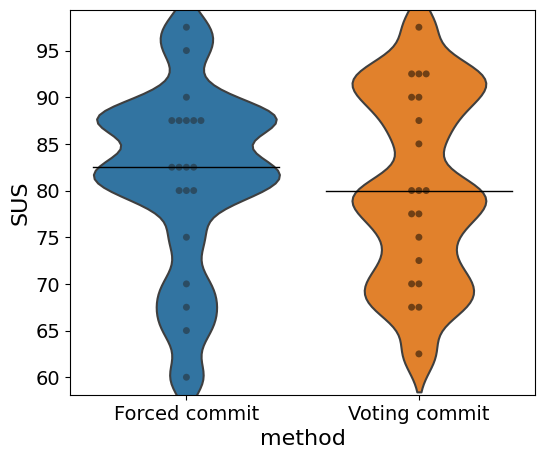

In [7]:
da=[fc['SUS'],vc['SUS']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])
my_pal = {"Forced commit": "red", "Voting commit": "mediumseagreen"}
fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=16)
plt.ylabel('SUS', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

/home/andrea/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


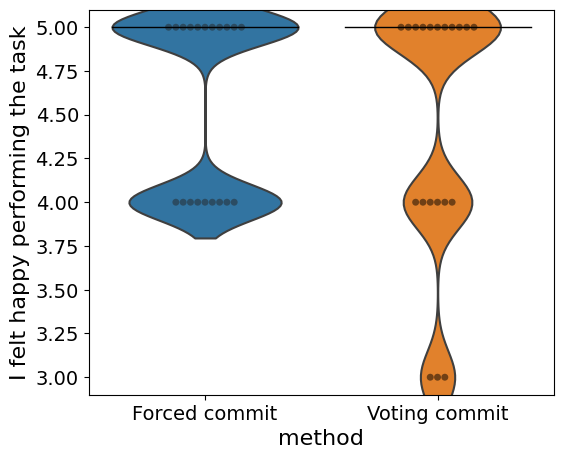

In [9]:
da=[fc['I felt happy performing the task.'],vc['I felt happy performing the task.']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=16)
plt.ylabel('I felt happy performing the task', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("happy.svg")

In [10]:
data = pd.read_csv("Pairs.csv")
fc=data[data.Method == "Forced commit"]
vc=data[data.Method == "Voting commit"]
data.head()

,ID,Unnamed: 1,time,talking,Subject pair ID,Method,mord
0,1,0.006944,600,35.50,1,Forced commit,1
1,3,0.005787,500,44.60,1,Voting commit,2
2,5,0.006343,548,25.18,2,Voting commit,1
3,7,0.003507,303,23.10,2,Forced commit,2
4,9,0.005301,458,31.00,3,Forced commit,1


/home/andrea/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


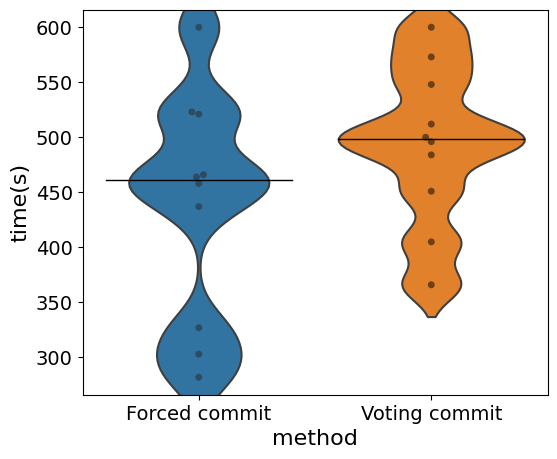

In [11]:
da=[fc['time'],vc['time']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=16)
plt.ylabel('time(s)', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("stime.svg")

/home/andrea/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


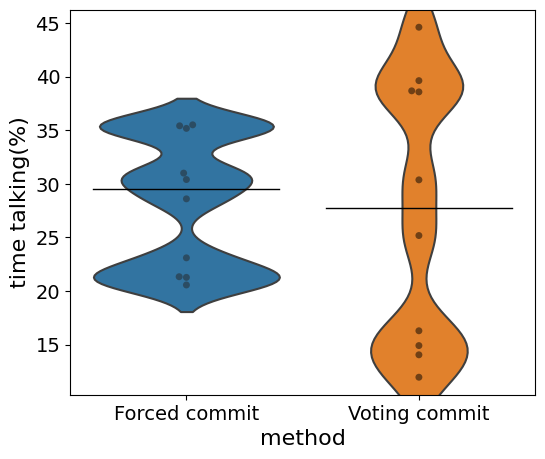

In [12]:
da=[fc['talking'],vc['talking']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=16)
plt.ylabel('time talking(%)', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("talking.svg")

In [13]:
scipy.stats.mannwhitneyu(fc['talking'],vc['talking'])

MannwhitneyuResult(statistic=51.0, pvalue=0.9698499769931556)

## correlazione tra time talking e time per i due metodi

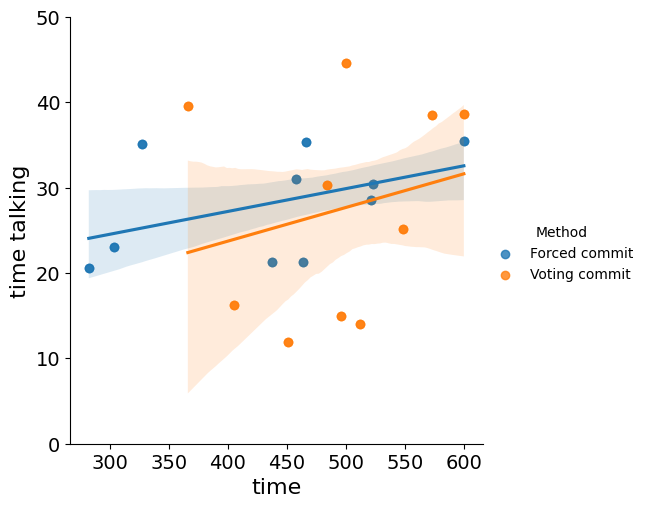

In [14]:
g=sns.lmplot(y="talking", x="time", data=dat, hue="Method");
plt.ylabel('time talking', fontsize=16)
plt.xlabel('time', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
g.set(ylim=(0, 50))

In [15]:
scipy.stats.mannwhitneyu(fc['time'],vc['time'])

MannwhitneyuResult(statistic=34.5, pvalue=0.25666036991585695)

In [135]:
print(fc)

    ID  Unnamed: 1  time  talking  Subject pair ID         Method  mord
0    1    0.006944   600    35.50                1  Forced commit     1
3    7    0.003507   303    23.10                2  Forced commit     2
4    9    0.005301   458    31.00                3  Forced commit     1
7   15    0.003785   327    35.17                4  Forced commit     2
8   17    0.003264   282    20.57                5  Forced commit     1
11  23    0.005370   464    21.34                6  Forced commit     2
12  25    0.005394   466    35.41                7  Forced commit     1
15  31    0.005058   437    21.28                8  Forced commit     2
16  33    0.006053   523    30.40                9  Forced commit     1
19  39    0.006030   521    28.60               10  Forced commit     2


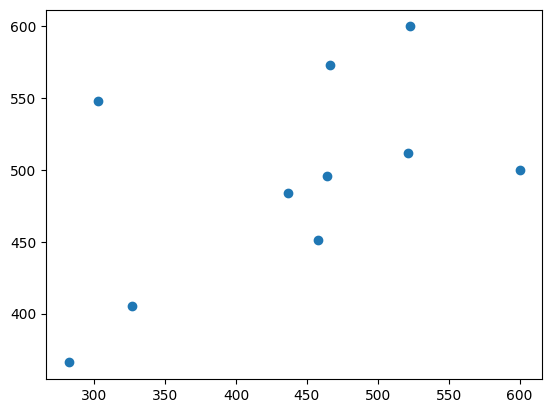

In [136]:
plt.scatter(fc['time'],vc['time'])

In [16]:
d2 = pd.pivot_table(data, index='Subject pair ID', columns='mord', values=['time','talking'])
print(d2.mean())

         mord
talking  1        25.371
         2        30.292
time     1       477.400
         2       454.200
dtype: float64


In [17]:
d3 = pd.pivot_table(data, index='Subject pair ID', columns='Method', values=['time','talking'])
print(d3.mean())

         Method       
talking  Forced commit     28.237
         Voting commit     27.426
time     Forced commit    438.100
         Voting commit    493.500
dtype: float64


In [18]:
print(d3)


                      talking                        time              
Method          Forced commit Voting commit Forced commit Voting commit
Subject pair ID                                                        
1                       35.50         44.60           600           500
2                       23.10         25.18           303           548
3                       31.00         11.97           458           451
4                       35.17         16.30           327           405
5                       20.57         39.62           282           366
6                       21.34         14.92           464           496
7                       35.41         38.57           466           573
8                       21.28         30.37           437           484
9                       30.40         38.67           523           600
10                      28.60         14.06           521           512


In [ ]:
da=[fc['talking'],vc['talking']]
pdf = pd.DataFrame(np.transpose(da),columns = ["Forced commit","Voting commit"])

fig, ax = plt.subplots(figsize=(6, 5))
sns.violinplot(data=pdf, inner=None, bw=.2)
sns.swarmplot(data=pdf,color="black", edgecolor="gray", alpha=0.5)
sns.boxplot(showmeans=True,
            meanline=True,
            medianprops={'color': 'k', 'ls': '-', 'lw': 1},
            meanprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=pdf,
            showfliers=False,
            showbox=False,
            showcaps=False,
           )
plt.xlabel('method', fontsize=16)
plt.ylabel('time talking(%)', fontsize=16)
#plt.title('objects seeen')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("talking.svg")